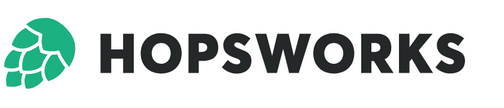

# Batch Predictions

**Note**: you may get an error when installing hopsworks on Colab, and it is safe to ignore it.

## 🗒️ This notebook is divided in 3 main sections:
1. **Read a batch of data, ready for batch inference**
2. **Download & use the model to generate predictions using the inference data**
3. **Save the UI output as a .png graph, and write the predictions to a Feature Group**

In [1]:
!pip install -U hopsworks --quiet

In [2]:
import hopsworks

project = hopsworks.login()

fs = project.get_feature_store()
mr = project.get_model_registry()

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/41114
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


In [3]:
import datetime
start_date = (datetime.datetime.now() - datetime.timedelta(hours=24)) 
end_date = (datetime.datetime.now()) 
print(start_date)
print(end_date)

2023-06-13 00:54:35.844135
2023-06-14 00:54:35.844135


In [4]:
feature_view = fs.get_feature_view("cc_trans_fraud", 1)

feature_view.init_batch_scoring(training_dataset_version=1)

In [5]:
print(feature_view.get_batch_query())

WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `mlopscoe_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `mlopscoe_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg1`.`trans_volume_mstd` `trans_volume_mstd`, 

In [6]:
transactions_df = feature_view.get_batch_data(start_time = start_date, end_time = end_date)
transactions_df

2023-06-14 00:54:45,689 INFO: USE `mlopscoe_featurestore`
2023-06-14 00:54:46,633 INFO: WITH right_fg0 AS (SELECT *
FROM (SELECT `fg2`.`tid` `tid`, `fg2`.`datetime` `datetime`, `fg2`.`cc_num` `join_pk_cc_num`, `fg2`.`datetime` `join_evt_datetime`, `fg0`.`cc_num` `cc_num`, `fg0`.`category` `category`, `fg0`.`amount` `amount`, `fg0`.`age_at_transaction` `age_at_transaction`, `fg0`.`days_until_card_expires` `days_until_card_expires`, `fg0`.`loc_delta_t_minus_1` `loc_delta_t_minus_1`, `fg0`.`time_delta_t_minus_1` `time_delta_t_minus_1`, RANK() OVER (PARTITION BY `fg2`.`cc_num`, `fg2`.`datetime` ORDER BY `fg0`.`datetime` DESC) pit_rank_hopsworks
FROM `mlopscoe_featurestore`.`transactions_fraud_label_2` `fg2`
INNER JOIN `mlopscoe_featurestore`.`cc_trans_fraud_2` `fg0` ON `fg2`.`cc_num` = `fg0`.`cc_num` AND `fg2`.`datetime` >= `fg0`.`datetime`
WHERE `fg2`.`datetime` >= 1686617675844 AND `fg2`.`datetime` <= 1686704075844) NA
WHERE `pit_rank_hopsworks` = 1), right_fg1 AS (SELECT *
FROM (SELECT 

,tid,datetime,cc_num,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,3af7ad4372cabcc4280d0864a4461425,1686643001000,4003456744416606,0,0.003276,0.955567,0.152265,0.004922,0.005391,0.006141,0.005951,0.005951,0.085823
1,9c8ffa2930666f954f91509499ad099b,1686652888000,4003456744416606,0,0.026188,0.955571,0.152209,0.063964,0.004055,0.026769,0.026583,0.026583,0.088036
2,3b7ccf52755d26b87141d0273e81ccc4,1686660326000,4003456744416606,0,0.000520,0.955574,0.152167,0.058805,0.032794,0.026102,0.025915,0.025915,0.088026
3,117a48dd51d437224411a183ded411c0,1686643042000,4004381777063357,0,0.002314,0.383995,0.787964,0.015368,0.004074,0.004754,0.004563,0.004563,0.219105
4,3f517753dddf0914b23e6da7db3ff476,1686650515000,4004381777063357,0,0.029717,0.383998,0.787922,0.236254,0.010754,0.027591,0.027405,0.027405,0.265229
...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,c3951e307433df7d3b1c9317f422d981,1686668489000,4991539658091830,0,0.001786,0.607552,0.743108,0.158545,0.019917,0.112029,0.111859,0.111859,0.251472
676,f651a8ae2abb7042a3e5733dfbbc7f48,1686639524000,4999763787658689,0,0.002908,0.053468,0.077925,0.016010,0.005100,0.019405,0.019217,0.019217,0.133827
677,5fba774b5d251edc3ee38d4044079d3a,1686648878000,4999763787658689,0,0.003285,0.053472,0.077873,0.058828,0.002647,0.010536,0.010346,0.010346,0.111811
678,42481064ecbb047dad8ce15dc54df48e,1686653733000,4999763787658689,0,0.002498,0.053474,0.077845,0.203850,0.081396,0.007292,0.007102,0.007102,0.163065


In [7]:
features_df = transactions_df.iloc[: , 3:]
features_df

,category,amount,age_at_transaction,days_until_card_expires,loc_delta_t_minus_1,time_delta_t_minus_1,trans_volume_mstd,trans_volume_mavg,trans_freq,loc_delta_mavg
0,0,0.003276,0.955567,0.152265,0.004922,0.005391,0.006141,0.005951,0.005951,0.085823
1,0,0.026188,0.955571,0.152209,0.063964,0.004055,0.026769,0.026583,0.026583,0.088036
2,0,0.000520,0.955574,0.152167,0.058805,0.032794,0.026102,0.025915,0.025915,0.088026
3,0,0.002314,0.383995,0.787964,0.015368,0.004074,0.004754,0.004563,0.004563,0.219105
4,0,0.029717,0.383998,0.787922,0.236254,0.010754,0.027591,0.027405,0.027405,0.265229
...,...,...,...,...,...,...,...,...,...,...
675,0,0.001786,0.607552,0.743108,0.158545,0.019917,0.112029,0.111859,0.111859,0.251472
676,0,0.002908,0.053468,0.077925,0.016010,0.005100,0.019405,0.019217,0.019217,0.133827
677,0,0.003285,0.053472,0.077873,0.058828,0.002647,0.010536,0.010346,0.010346,0.111811
678,0,0.002498,0.053474,0.077845,0.203850,0.081396,0.007292,0.007102,0.007102,0.163065


In [8]:
import joblib

the_model = mr.get_model("cc_fraud", version=1)
model_dir = the_model.download()

model = joblib.load(model_dir + "/cc_fraud_model.pkl")

## <span style="color:#ff5f27;">  Use the model to score transactions </span>

In [9]:
predictions = model.predict(features_df)

In [10]:
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [11]:
transactions_df['prediction'] = predictions.tolist()

In [12]:
results_df = transactions_df.copy()[["tid", "cc_num", "datetime", "prediction"]]

In [13]:
results_df.loc[:,'batch_start_date'] = start_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date
0,3af7ad4372cabcc4280d0864a4461425,4003456744416606,1686643001000,0,2023-06-13 00:54:35.844135
1,9c8ffa2930666f954f91509499ad099b,4003456744416606,1686652888000,0,2023-06-13 00:54:35.844135
2,3b7ccf52755d26b87141d0273e81ccc4,4003456744416606,1686660326000,0,2023-06-13 00:54:35.844135
3,117a48dd51d437224411a183ded411c0,4004381777063357,1686643042000,0,2023-06-13 00:54:35.844135
4,3f517753dddf0914b23e6da7db3ff476,4004381777063357,1686650515000,0,2023-06-13 00:54:35.844135
...,...,...,...,...,...
675,c3951e307433df7d3b1c9317f422d981,4991539658091830,1686668489000,0,2023-06-13 00:54:35.844135
676,f651a8ae2abb7042a3e5733dfbbc7f48,4999763787658689,1686639524000,0,2023-06-13 00:54:35.844135
677,5fba774b5d251edc3ee38d4044079d3a,4999763787658689,1686648878000,0,2023-06-13 00:54:35.844135
678,42481064ecbb047dad8ce15dc54df48e,4999763787658689,1686653733000,0,2023-06-13 00:54:35.844135


In [14]:
results_fg = fs.get_or_create_feature_group(
    name="cc_fraud_results",
    version=1,
    description="Number of predicted frauds by card",
    primary_key=["cc_num"],
    event_time="datetime"
)
results_fg.insert(results_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/41114/fs/41034/fg/61826


Uploading Dataframe: 0.00% |          | Rows 0/680 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/41114/jobs/named/cc_fraud_results_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x2333de5be80>, None)

In [15]:
results_df.loc[:,'batch_end_date'] = end_date
results_df

,tid,cc_num,datetime,prediction,batch_start_date,batch_end_date
0,3af7ad4372cabcc4280d0864a4461425,4003456744416606,1686643001000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
1,9c8ffa2930666f954f91509499ad099b,4003456744416606,1686652888000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
2,3b7ccf52755d26b87141d0273e81ccc4,4003456744416606,1686660326000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
3,117a48dd51d437224411a183ded411c0,4004381777063357,1686643042000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
4,3f517753dddf0914b23e6da7db3ff476,4004381777063357,1686650515000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
...,...,...,...,...,...,...
675,c3951e307433df7d3b1c9317f422d981,4991539658091830,1686668489000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
676,f651a8ae2abb7042a3e5733dfbbc7f48,4999763787658689,1686639524000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
677,5fba774b5d251edc3ee38d4044079d3a,4999763787658689,1686648878000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135
678,42481064ecbb047dad8ce15dc54df48e,4999763787658689,1686653733000,0,2023-06-13 00:54:35.844135,2023-06-14 00:54:35.844135


In [16]:
import numpy as np
unique, counts = np.unique(predictions, return_counts=True)

In [17]:
print(np.asarray((unique, counts)).T)

[[  0 680]]


In [19]:
print(counts[0])

680


In [21]:
import pandas as pd
data = {'datetime': [start_date], 'num_predicted_fraud': [counts[0]]}
df = pd.DataFrame.from_dict(data)

### Write the number of predicted credit card frauds to a Feature Group


In [22]:
fraud_fg = fs.get_or_create_feature_group(
    name="predicted_fraud",
    version=1,
    description="Number of predicted frauds by day",
    primary_key=["datetime"],
    event_time="datetime"
)
fraud_fg.insert(df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/41114/fs/41034/fg/61828


Uploading Dataframe: 0.00% |          | Rows 0/1 | Elapsed Time: 00:00 | Remaining Time: ?

Launching offline feature group backfill job...
Backfill Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/41114/jobs/named/predicted_fraud_1_offline_fg_backfill/executions


(<hsfs.core.job.Job at 0x2333de5a0e0>, None)

### Create a graph of the numer of suspected fraudulent transactions over time

First, read up all the historical suspected fraudulent transactions 

In [23]:
history_df = fraud_fg.read()

2023-06-14 00:59:16,121 INFO: USE `mlopscoe_featurestore`
2023-06-14 00:59:16,990 INFO: SELECT `fg0`.`datetime` `datetime`, `fg0`.`num_predicted_fraud` `num_predicted_fraud`
FROM `mlopscoe_featurestore`.`predicted_fraud_1` `fg0`


In [24]:
# Sort the historical fraud predictions by day
history_df = history_df.sort_values(by = ['datetime'])  

In [25]:
history_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   datetime             1 non-null      datetime64[ns]
 1   num_predicted_fraud  1 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 24.0 bytes


In [26]:
history_df['day_of_year'] = history_df['datetime'].dt.dayofyear 

history_df

,datetime,num_predicted_fraud,day_of_year
0,2023-06-13 00:54:35.844,680,164


<Figure size 1500x700 with 0 Axes>

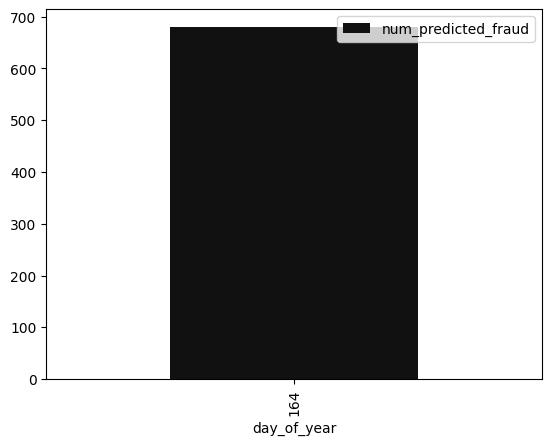

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

color='#111111'
plt.figure(figsize=(15, 7))

history_df.plot(kind='bar', x='day_of_year', y='num_predicted_fraud', color=color)

plt.savefig("fraud_counts.png")
plt.show()

plt.close()
